<a href="https://colab.research.google.com/github/khanArham0029/Digital-Image-Processing-A2/blob/main/DIP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

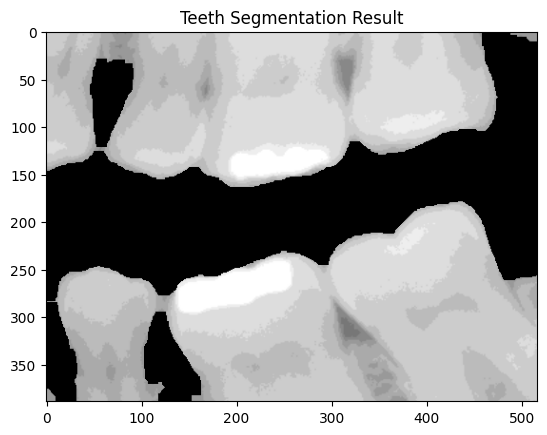

In [ ]:
#Question 1 Part 1
import cv2
import numpy as np
import matplotlib.pyplot as plt

def separate_teeth(image_path):

    img = cv2.imread(image_path)

    if img is None:
        print("Error: Unable to load image")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Morphological operations to remove noise and fill gaps
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Find contours
    contours, _ = cv2.findContours(sure_bg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for teeth
    mask = np.zeros_like(gray)

    # Draw contours on the mask
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 1000:  # Adjust this threshold based on your image
            cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)

    # Invert the mask
    mask_inv = cv2.bitwise_not(mask)

    # Convert the mask to 3 channels
    mask_inv = cv2.cvtColor(mask_inv, cv2.COLOR_GRAY2BGR)

    # Set non-teeth areas to black
    result = cv2.bitwise_and(img, mask_inv)

    return result

# Example usage:
image_path = "/content/Image_Q1.PNG"
result_image = separate_teeth(image_path)

if result_image is not None:
  plt.imshow(result_image)
  plt.title('Teeth Segmentation Result')
  plt.show()

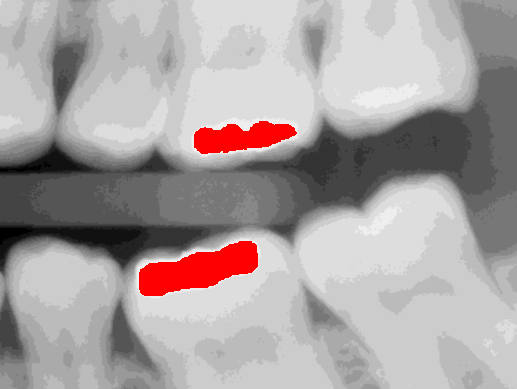

Percentage of affected pixels: 2.99%


In [ ]:
#Question 1 part 2
import cv2
import numpy as np

def highlight_affected_teeth(input_image_path, output_image_path):
    # Read the input image
    img = cv2.imread(input_image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to identify the brightest regions (teeth issues)
    _, thresh = cv2.threshold(gray_img, 240, 255, cv2.THRESH_BINARY)

    # Find contours of the thresholded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask to separate the affected areas
    mask = np.zeros_like(gray_img)

    # Draw filled contours (affected areas) on the mask
    cv2.drawContours(mask, contours, -1, (255), cv2.FILLED)

    # Convert the mask to a 3-channel image to match the shape of the input image
    mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Copy the input image
    result = img.copy()

    # Iterate over the image and apply red color to affected pixels
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if mask[y, x] == 255:
                result[y, x] = [0, 0, 255]

    # Save the resulting image
    cv2.imwrite(output_image_path, result)

    # Display the result using cv2_imshow() from Google Colab
    from google.colab.patches import cv2_imshow
    cv2_imshow(result)

def calculate_affected_percentage(input_image_path):
    # Read the input image
    img = cv2.imread(input_image_path)

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the image to identify the affected areas
    _, thresh = cv2.threshold(gray_img, 240, 255, cv2.THRESH_BINARY)

    # Calculate the percentage of affected pixels
    total_pixels = np.prod(thresh.shape)
    affected_pixels = np.count_nonzero(thresh == 255)
    percentage_affected = (affected_pixels / total_pixels) * 100

    return percentage_affected

if __name__ == "__main__":
    input_image_path = "/content/Image_Q1.PNG"
    output_image_path = "/content/Image_Q1_Output.PNG"

    # Highlight the affected pixels in teeth and save the output image
    highlight_affected_teeth(input_image_path, output_image_path)

    # Calculate the percentage of affected pixels
    percentage_affected = calculate_affected_percentage(input_image_path)
    print(f"Percentage of affected pixels: {percentage_affected:.2f}%")


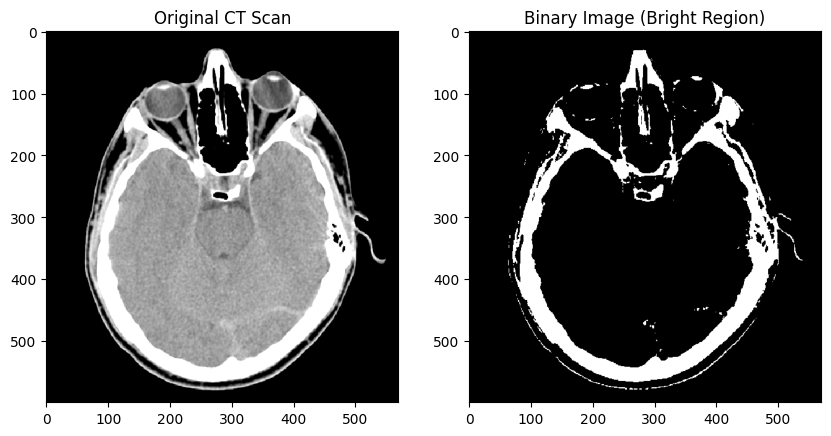

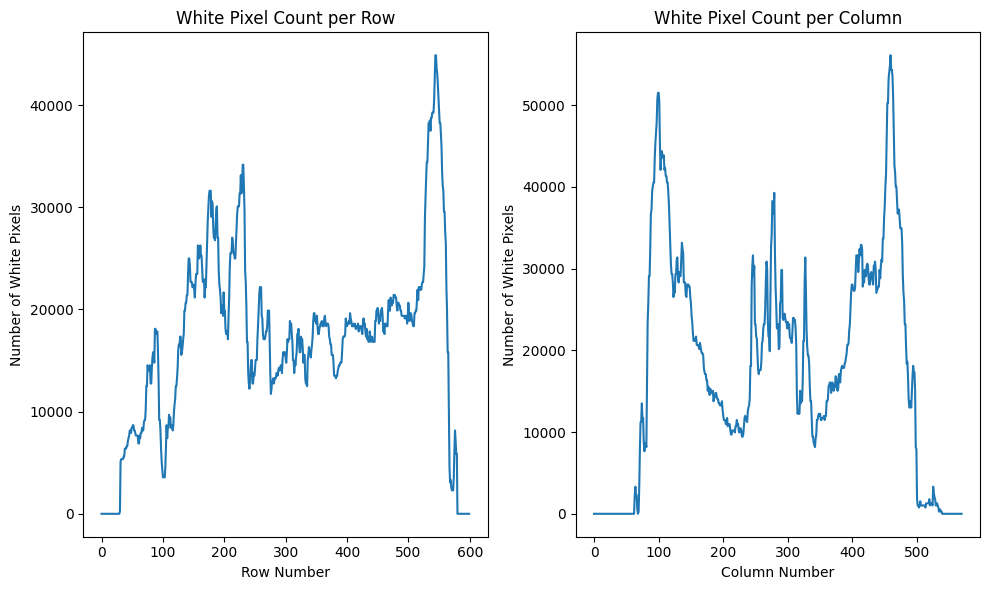

In [ ]:
#question 2
import cv2
import numpy as np
import matplotlib.pyplot as plt


# --- Load the CT Scan Image ---
image = cv2.imread('/content/Image_Q2.tif', 0)  # Replace with your image path
if image is None:
    print("Error: Could not load image.")
    exit()

# --- Intensity Slicing ---
def apply_intensity_slicing(img, lower_threshold, upper_threshold):
    mask = np.where((img >= lower_threshold) & (img <= upper_threshold), 255, 0)
    return mask.astype(np.uint8)  # Convert to a binary image format

# Example Threshold Values (Adjust as needed)
lower_threshold = 200
upper_threshold = 255

# Apply intensity slicing
binary_image = apply_intensity_slicing(image, lower_threshold, upper_threshold)

# --- Display Results ---
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original CT Scan')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image (Bright Region)')

plt.show()




row_counts = np.sum(binary_image, axis=1)
col_counts = np.sum(binary_image, axis=0)  # Sum along each column (axis=0)

# --- Plot Row and Column Pixel Counts ---
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(row_counts)
plt.xlabel('Row Number')
plt.ylabel('Number of White Pixels')
plt.title('White Pixel Count per Row')

plt.subplot(1, 2, 2)
plt.plot(col_counts)
plt.xlabel('Column Number')
plt.ylabel('Number of White Pixels')
plt.title('White Pixel Count per Column')

plt.tight_layout()  # Adjust subplot spacing
plt.show()


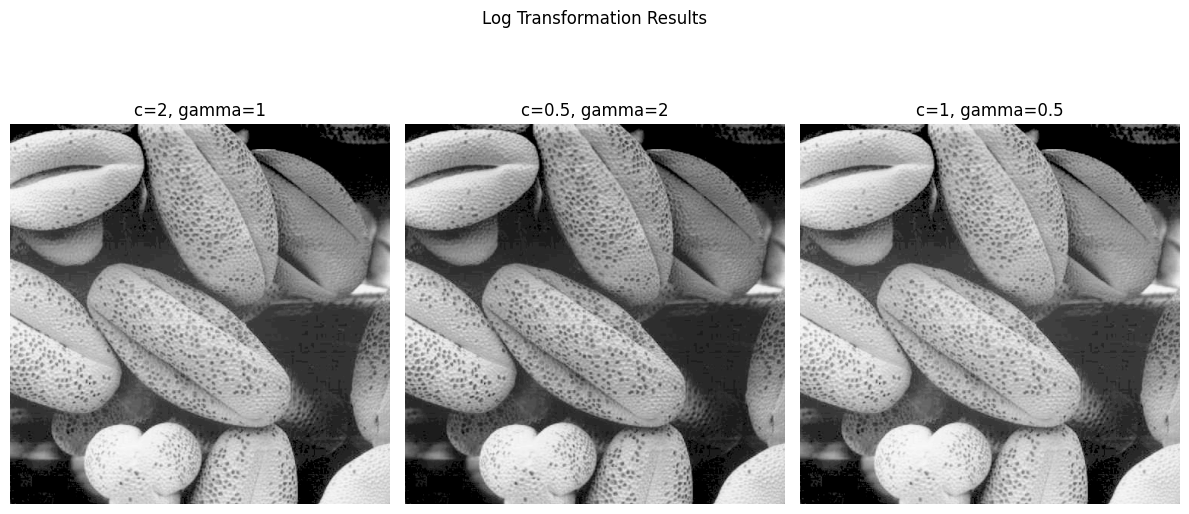

In [ ]:
#question 3
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply a log transformation with specified parameters
def apply_log_transform(img, c, gamma):
    return c * np.log(img + 1) ** gamma

# Load your grayscale image
image = cv2.imread('/content/Image_Q3.tif', 0)

# Define different log transformation parameters to experiment with
parameters = [
    {'title': 'c=2, gamma=1', 'c': 2, 'gamma': 1},
    {'title': 'c=0.5, gamma=2', 'c': 0.5, 'gamma': 2},
    {'title': 'c=1, gamma=0.5', 'c': 1, 'gamma': 0.5},
]

# Apply the transformations and display the results
fig, axes = plt.subplots(1, len(parameters), figsize=(12, 6))

for i, param in enumerate(parameters):
    transformed_img = apply_log_transform(image.copy(), param['c'], param['gamma'])
    axes[i].imshow(transformed_img, cmap='gray')
    axes[i].set_title(param['title'])
    axes[i].axis('off')

fig.suptitle('Log Transformation Results')
plt.tight_layout()
plt.show()


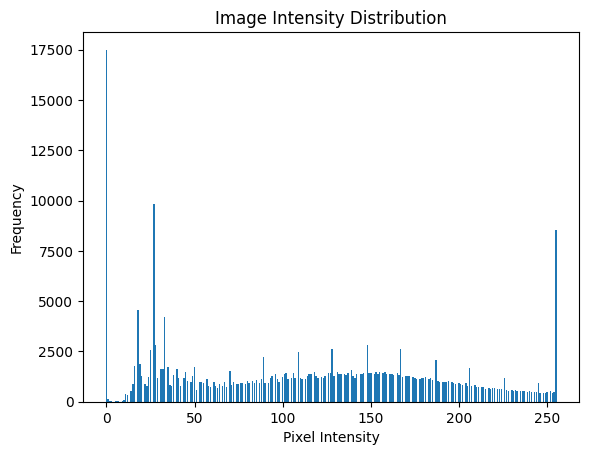

In [ ]:
#question 4
from PIL import Image
import matplotlib.pyplot as plt

def load_image_with_pillow(image_path):
    """Loads an image using the Pillow (PIL) library.

    Args:
        image_path (str): Path to the image file.

    Returns:
        numpy.ndarray: A 2D NumPy array representing the image.
    """

    image = Image.open(image_path).convert('L')  # Load as grayscale
    return np.array(image)

def count_pixel_intensities(image_array):  # Change argument to NumPy array
    """Counts the frequency of each pixel intensity in a grayscale image.

    Args:
        image_array (numpy.ndarray): A 2D NumPy array representing the image.

    Returns:
        dict: A dictionary where keys are pixel intensities (0-255) and
              values are the frequency counts.
    """

    intensity_counts = {}
    for row in image_array:
        for pixel in row:
            if pixel in intensity_counts:
                intensity_counts[pixel] += 1
            else:
                intensity_counts[pixel] = 1

    return intensity_counts

# Example Usage
image_path = '/content/Image_Q4.tif'
image_data = load_image_with_pillow(image_path)
counts = count_pixel_intensities(image_data)

# Plot the intensity distribution (histogram)
plt.bar(counts.keys(), counts.values())
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Intensity Distribution')
plt.show()


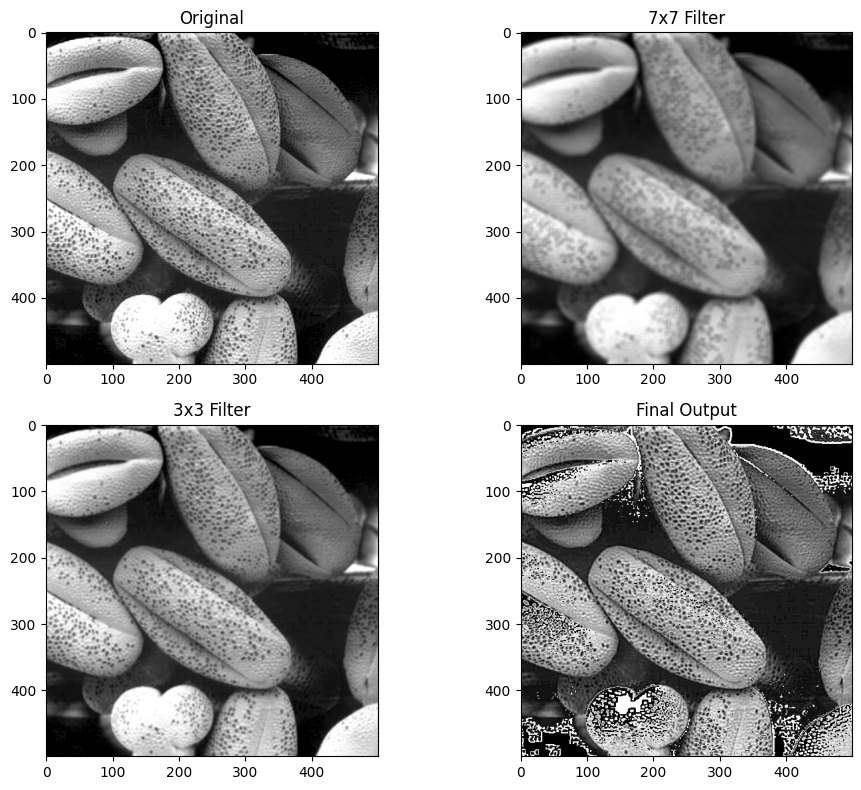

In [ ]:
#question 4 part 2
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ... (Your apply_box_filter function remains the same) ...
def apply_box_filter(image, filter_size):
  """Applies a box filter of a given size to an image.

  Args:
      image (np.ndarray): A 2D NumPy array representing the image.
      filter_size (int): The size of the box filter (e.g., 7 for a 7x7 filter).

  Returns:
      np.ndarray: The filtered image.
  """

  # Pad the image to handle boundaries
  pad_width = filter_size // 2
  padded_image = np.pad(image, pad_width, mode='edge')

  # Initialize output image
  filtered_image = np.zeros_like(image)
  #applying box filter
  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      window = padded_image[row:row+filter_size, col:col+filter_size]
      filtered_image[row, col] = np.mean(window)

  return filtered_image


# Load image
image = cv2.imread('/content/Image_Q4.tif', 0)  # Load as grayscale


# Apply box filters
O7 = apply_box_filter(image, 7)
O3 = apply_box_filter(image, 3)

# Calculate final output
final_output = image - np.abs(O7 - O3)

# Display the results using Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Create subplots

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(O7, cmap='gray')
axs[0, 1].set_title('7x7 Filter')

axs[1, 0].imshow(O3, cmap='gray')
axs[1, 0].set_title('3x3 Filter')

axs[1, 1].imshow(final_output, cmap='gray')
axs[1, 1].set_title('Final Output')

plt.tight_layout()  # Improve spacing
plt.show()


In [ ]:
#question 5
import cv2
import numpy as np

def estimate_filled_percentage(image, threshold=60):
    """Estimates the filled percentage of a bottle in an image.

    Args:
        image (numpy.ndarray): The input image.
        threshold (int, optional): The filled percentage threshold. Defaults to 80.

    Returns:
        float: The estimated filled percentage.
    """

    # Preprocessing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV) # Adjust 150 for your image

    # Find contours (outlines) in the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assumes bottle is the largest contour
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)

        # Approximate the contour with a rectangle
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Get the region of interest (ROI) where the syrup is likely located
        syrup_roi = gray[y:y+h, x:x+w]

        # Calculate filled percentage within the ROI
        filled_pixels = np.sum(syrup_roi < 100)  # Adjust 100 for your image
        total_pixels = syrup_roi.size
        filled_percentage = (filled_pixels / total_pixels) * 100

        # Display message based on threshold
        if filled_percentage < threshold:
            print("Bottle is not properly filled.")
        else:
            print("Bottle is properly filled.")

        return filled_percentage
    else:
        print("Error: Bottle contour not found.")
        return None

# Load image
image = cv2.imread('/content/Image_Q5_1.PNG')

#image = cv2.imread('/content/Image_Q5_2.PNG')

# Estimate the filled percentage
filled_percentage = estimate_filled_percentage(image)


Bottle is not properly filled.
